Tahriou Samira
Logistic regression

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Load data 

In [3]:
data=pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


# Explore data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.67,8.21,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.56,0.50,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.57,0.50,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.50,0.50,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.50,0.50,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.50,0.50,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.67,0.47,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.56,0.50,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.56,0.50,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.56,0.50,1.0,1.0,2.0,2.0,2.0


In [6]:
def d_null(data):
    d_null=data.isna().sum()
    if d_null[d_null>0].any() :
        print(d_null[d_null>0])
    else:
        print('NO Missing')
d_null(data)

NO Missing


In [7]:
data.duplicated().sum()

33

In [8]:
data.columns.tolist()

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

# Data cleaning 

In [9]:
data.columns=data.columns.str.lower()

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(276, 16)

In [12]:
data['lung_cancer'].replace({'YES':2,'NO':1},inplace=True)
data[['lung_cancer']]

,lung_cancer
0,2
1,2
2,1
3,1
4,1
...,...
279,2
280,1
281,1
282,1


In [13]:
data['gender'].replace({'M':1,'F':0},inplace=True)
data[['gender']]

,gender
0,1
1,1
2,0
3,1
4,0
...,...
279,0
280,0
281,1
282,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   gender                 276 non-null    int64
 1   age                    276 non-null    int64
 2   smoking                276 non-null    int64
 3   yellow_fingers         276 non-null    int64
 4   anxiety                276 non-null    int64
 5   peer_pressure          276 non-null    int64
 6   chronic disease        276 non-null    int64
 7   fatigue                276 non-null    int64
 8   allergy                276 non-null    int64
 9   wheezing               276 non-null    int64
 10  alcohol consuming      276 non-null    int64
 11  coughing               276 non-null    int64
 12  shortness of breath    276 non-null    int64
 13  swallowing difficulty  276 non-null    int64
 14  chest pain             276 non-null    int64
 15  lung_cancer            276 non-null    int64


# EDA 

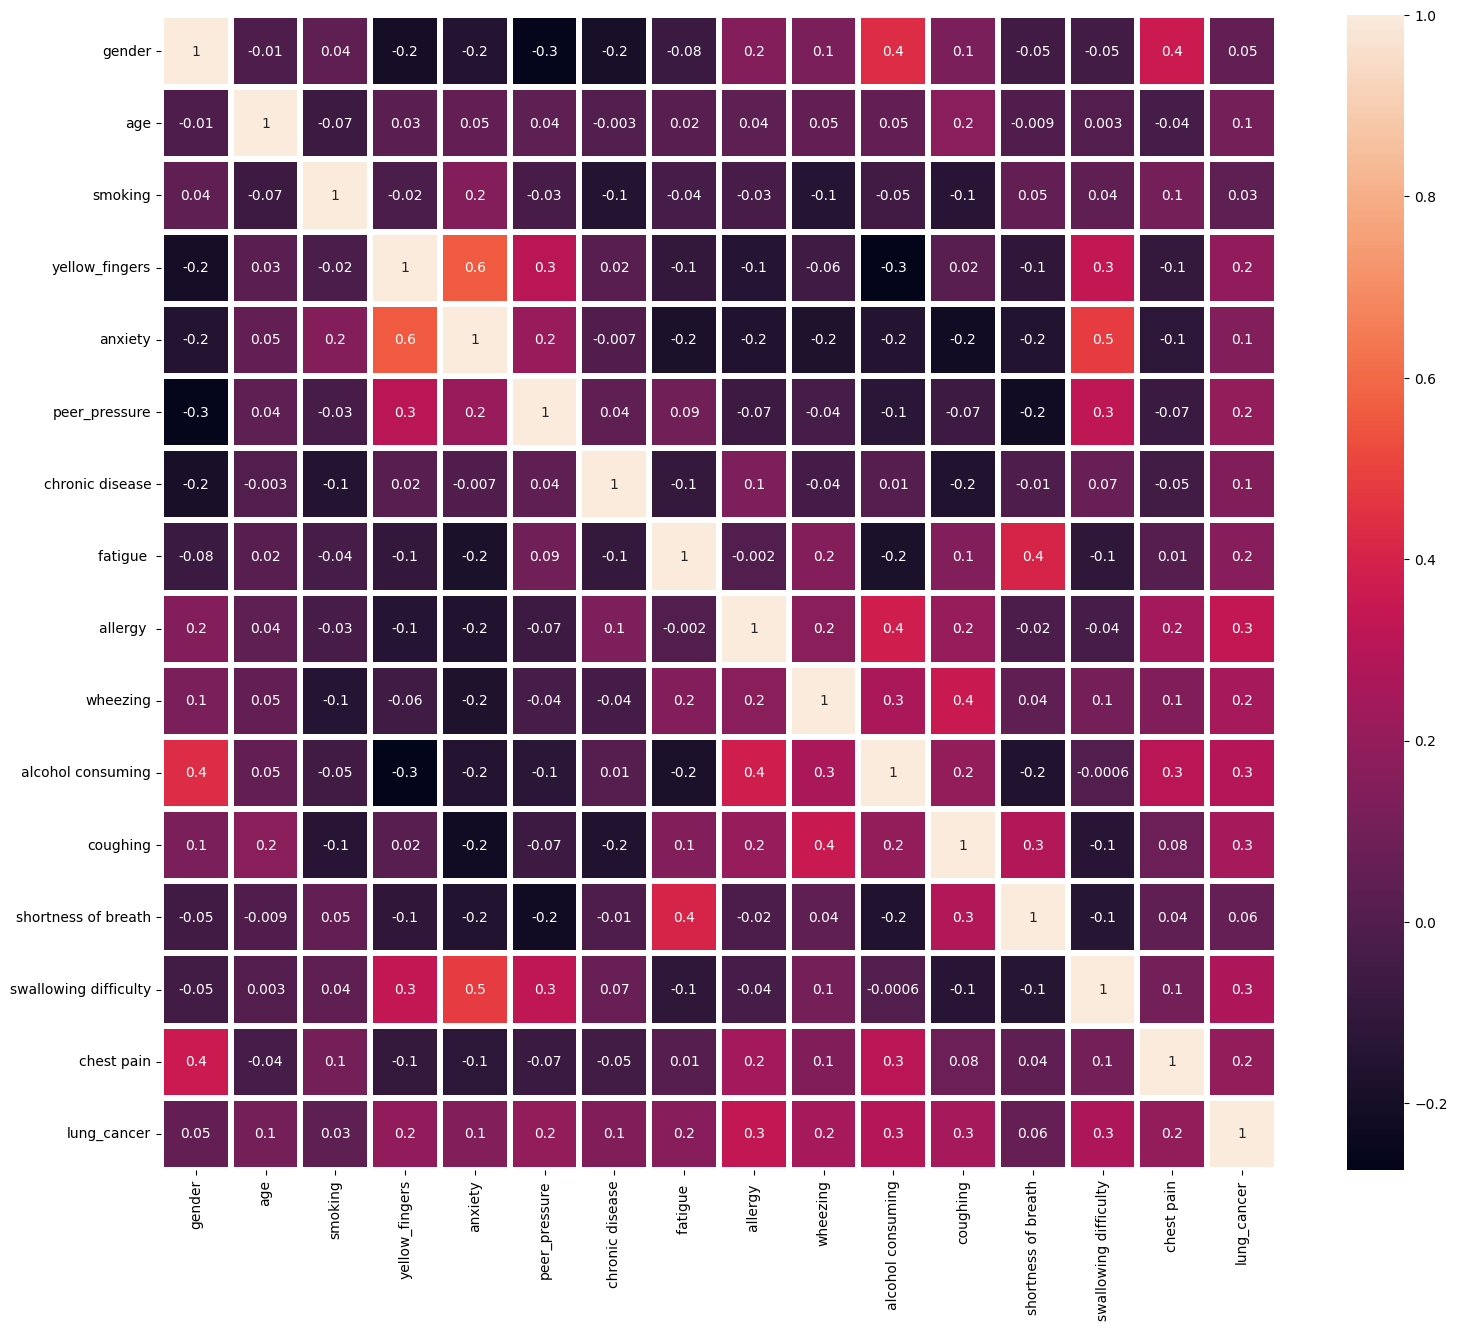

In [15]:
corr_matrix=data.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix,annot=True,linewidths=4,fmt='.1g',)
plt.show()

## Age

In [16]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [17]:
data['age'].value_counts()

age
64    18
60    16
56    16
62    16
59    15
63    15
70    14
61    14
67    11
69    10
55    10
72    10
68     9
71     9
57     9
77     9
58     8
54     7
74     6
65     5
51     5
75     5
73     4
52     4
53     4
66     4
76     3
47     3
49     3
48     2
44     2
78     2
81     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

In [18]:
len(data[data.age<49])

11

Text(0.5, 1.0, 'Age Distribution')

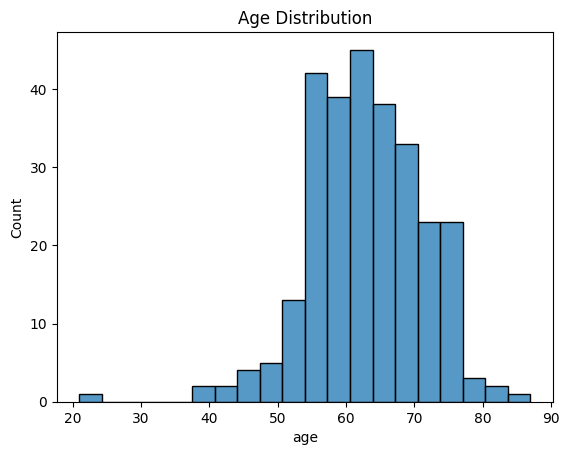

In [19]:
sns.histplot(x='age',data=data)
plt.title('Age Distribution')

In [20]:
scipy.stats.spearmanr(data['age'],data['lung_cancer'])

SignificanceResult(statistic=0.09656644092639528, pvalue=0.10943355450879182)

In [21]:
age_data=data[['age','chest pain','coughing', 'swallowing difficulty']]
age_data.corr()

,age,chest pain,coughing,swallowing difficulty
age,1.000000,-0.035806,0.168654,0.003199
chest pain,-0.035806,1.000000,0.077988,0.102674
coughing,0.168654,0.077988,1.000000,-0.136885
swallowing difficulty,0.003199,0.102674,-0.136885,1.000000


In [22]:
age_gr=data.groupby('age',as_index=False)[['chest pain','coughing', 'swallowing difficulty']].value_counts()
gr=pd.DataFrame(age_gr)
gr

,age,chest pain,coughing,swallowing difficulty,count
0,21,1,1,1,1
1,38,2,2,1,1
2,39,2,1,1,1
3,44,1,1,2,1
4,44,2,1,2,1
...,...,...,...,...,...
158,78,2,1,2,1
159,79,2,2,2,1
160,81,1,2,1,1
161,81,2,2,2,1


## Gender

In [23]:
data.gender.value_counts()

gender
1    142
0    134
Name: count, dtype: int64

In [24]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

<Axes: xlabel='gender'>

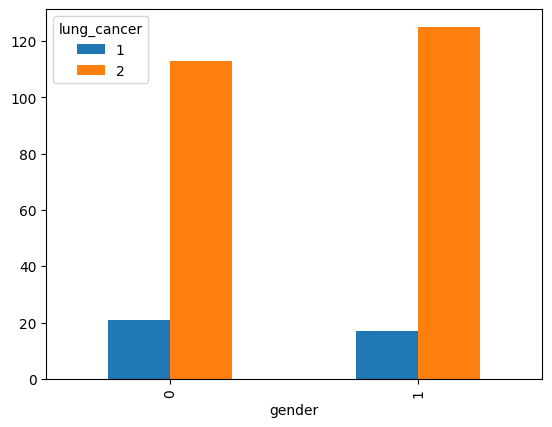

In [25]:
sex=pd.crosstab(data.gender,data['lung_cancer'])
sex.plot.bar()

In [26]:
data.groupby(['gender', 'peer_pressure','lung_cancer']).agg({'age': ['min', 'max', 'mean']})

age               
                                 min max       mean
gender peer_pressure lung_cancer                   
0      1             1            21  87  60.833333
                     2            38  75  63.433333
       2             1            57  64  60.000000
                     2            44  81  63.457831
1      1             1            46  69  58.200000
                     2            48  79  63.230769
       2             1            59  69  64.142857
                     2            39  78  62.872340

In [27]:
data.groupby(['gender', 'anxiety','lung_cancer']).agg({'age': ['min', 'max', 'mean']})

age               
                           min max       mean
gender anxiety lung_cancer                   
0      1       1            21  87  60.882353
               2            38  81  63.850000
       2       1            55  68  60.000000
               2            44  81  63.232877
1      1       1            47  69  61.111111
               2            39  79  62.287671
       2       1            46  68  60.125000
               2            52  77  64.230769

In [28]:
data.groupby(['gender', 'chest pain','lung_cancer']).agg({'age': ['min', 'max', 'mean']})

age               
                              min max       mean
gender chest pain lung_cancer                   
0      1          1            21  87  61.000000
                  2            44  81  63.738462
       2          1            57  59  58.000000
                  2            38  81  63.062500
1      1          1            55  68  61.571429
                  2            52  77  63.967742
       2          1            46  69  60.000000
                  2            39  79  62.808511

In [29]:
#weak positive 
scipy.stats.spearmanr(data['gender'],data['lung_cancer'])

SignificanceResult(statistic=0.0536655779607626, pvalue=0.3744582204386846)

In [30]:
gr=data.groupby('gender',as_index=False)[['age','lung_cancer']].value_counts()
female=gr[gr['gender']==0]
fem_gr=pd.DataFrame(female)


In [31]:
male=gr[gr['gender']==1]
male_gr=pd.DataFrame(male)
male_gr

,gender,age,lung_cancer,count
49,1,62,2,10
50,1,64,2,9
51,1,60,2,8
52,1,63,2,8
53,1,70,2,7
54,1,56,2,6
55,1,58,2,6
56,1,67,2,6
57,1,59,2,5
58,1,69,2,5


## smoking

In [32]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

In [33]:
data.smoking.value_counts()

smoking
2    150
1    126
Name: count, dtype: int64

In [34]:
sm=pd.crosstab(data.smoking,data['lung_cancer'])
sm

lung_cancer,1,2
smoking,,
1,19,107
2,19,131


<Axes: xlabel='smoking', ylabel='count'>

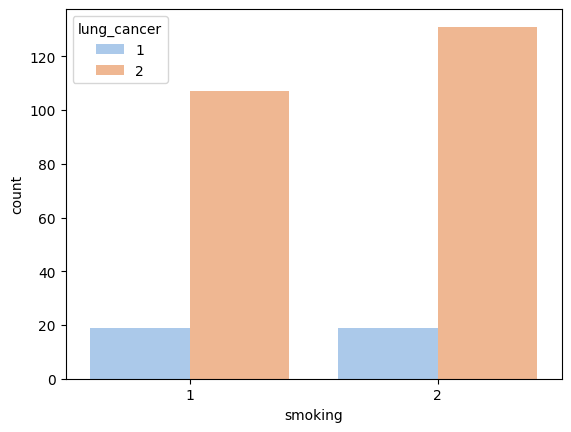

In [35]:
sns.countplot(x='smoking',hue='lung_cancer',data=data,palette='pastel')

In [36]:
scipy.stats.spearmanr(data['smoking'],data['lung_cancer'])

SignificanceResult(statistic=0.03487816787960422, pvalue=0.5639492701946421)

<Axes: >

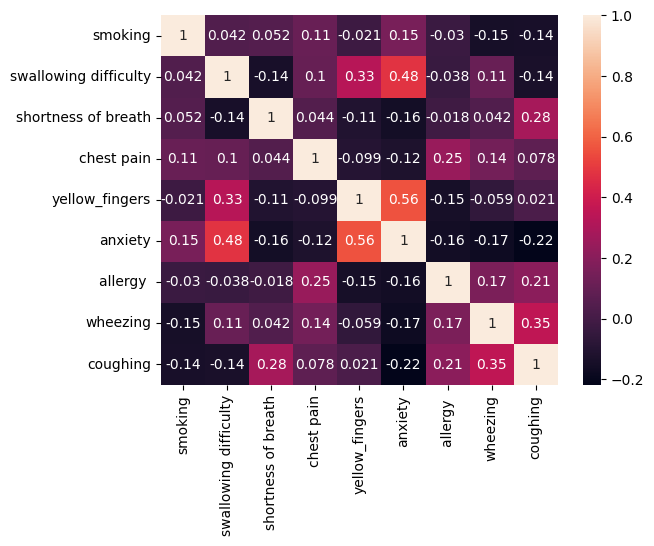

In [37]:
data_sm=data[['smoking','swallowing difficulty','shortness of breath','chest pain','yellow_fingers', 'anxiety','allergy ', 'wheezing','coughing']]
sm_corr=data_sm.corr()
sns.heatmap(sm_corr,annot=True)

<Axes: xlabel='smoking'>

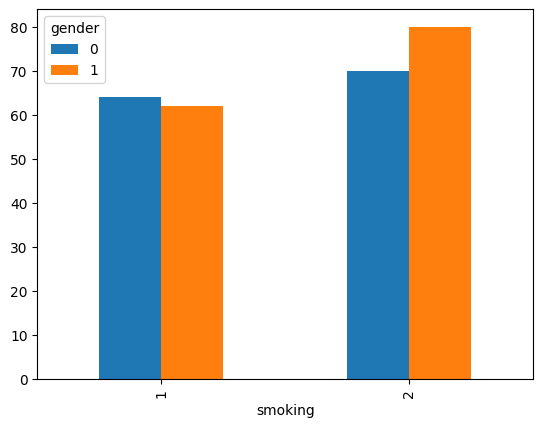

In [38]:
pd.crosstab(data.smoking,data.gender).plot.bar()

In [39]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic disease', 'fatigue ', 'allergy ', 'wheezing',
       'alcohol consuming', 'coughing', 'shortness of breath',
       'swallowing difficulty', 'chest pain', 'lung_cancer'],
      dtype='object')

<Axes: xlabel='smoking'>

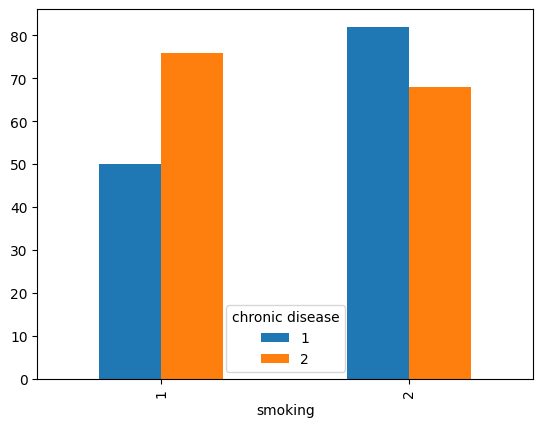

In [40]:
pd.crosstab(data.smoking,data['chronic disease']).plot.bar()

<Axes: xlabel='smoking'>

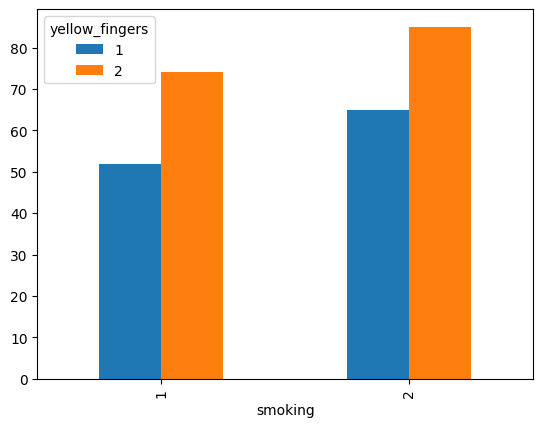

In [41]:
pd.crosstab(data.smoking,data['yellow_fingers']).plot.bar()

<Axes: xlabel='smoking'>

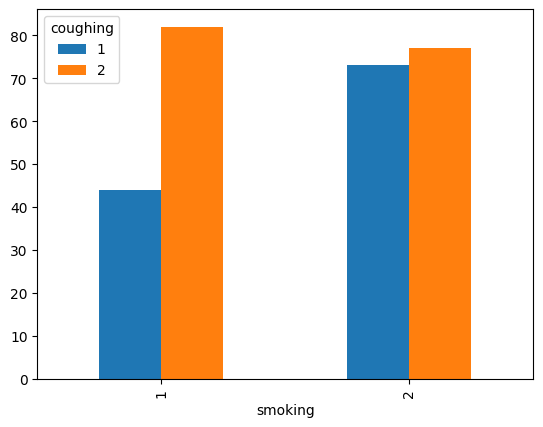

In [42]:
pd.crosstab(data.smoking,data['coughing']).plot.bar()

<Axes: xlabel='smoking'>

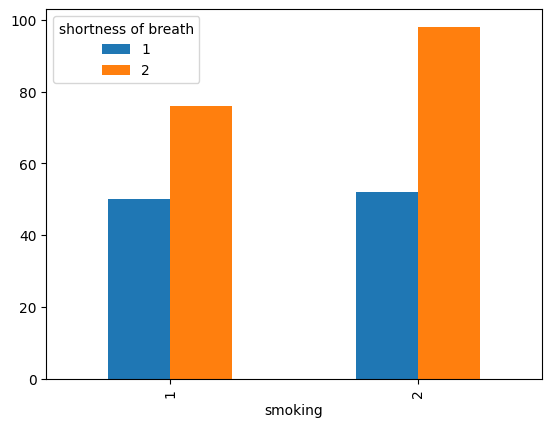

In [43]:
pd.crosstab(data.smoking,data['shortness of breath']).plot.bar()

## lung cancer 

In [44]:
data.lung_cancer.value_counts()

lung_cancer
2    238
1     38
Name: count, dtype: int64

In [45]:
scipy.stats.spearmanr(data['chest pain'],data['lung_cancer'])


SignificanceResult(statistic=0.1948557222318186, pvalue=0.0011389714581002597)

In [46]:
scipy.stats.spearmanr(data['alcohol consuming'],data['lung_cancer'])


SignificanceResult(statistic=0.2944221403875563, pvalue=6.36085868778738e-07)

In [47]:
scipy.stats.spearmanr(data['peer_pressure'],data['lung_cancer'])

SignificanceResult(statistic=0.19508605044975108, pvalue=0.0011233493083850593)

In [48]:
scipy.stats.spearmanr(data['anxiety'],data['lung_cancer'])

SignificanceResult(statistic=0.14432182569353633, pvalue=0.016424339633146007)

Number of unique values ("gender"): 2
        count
gender       
Yes       142
0         134


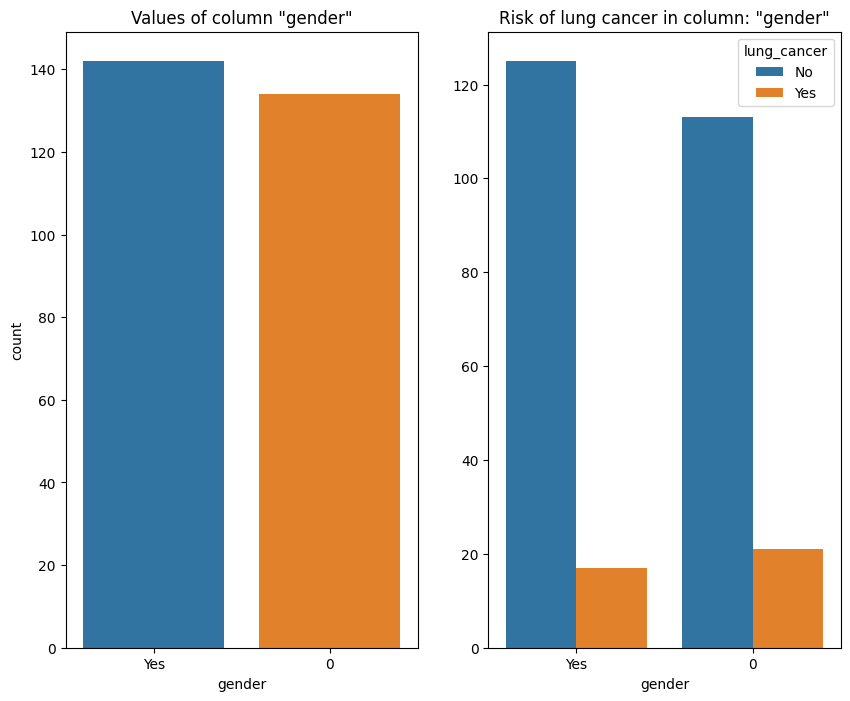

Number of unique values ("smoking"): 2
         count
smoking       
No         150
Yes        126


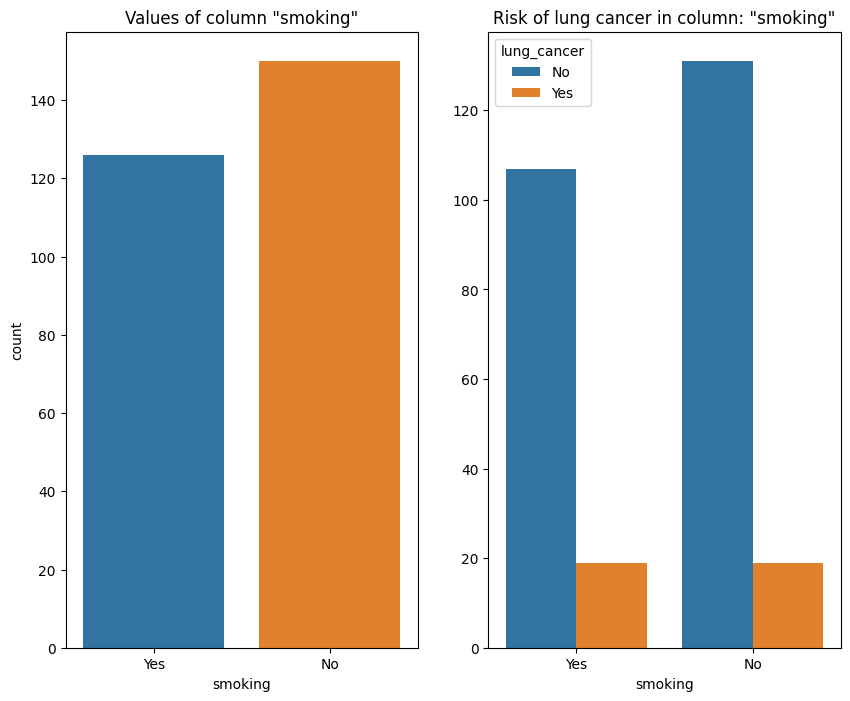

Number of unique values ("yellow_fingers"): 2
                count
yellow_fingers       
No                159
Yes               117


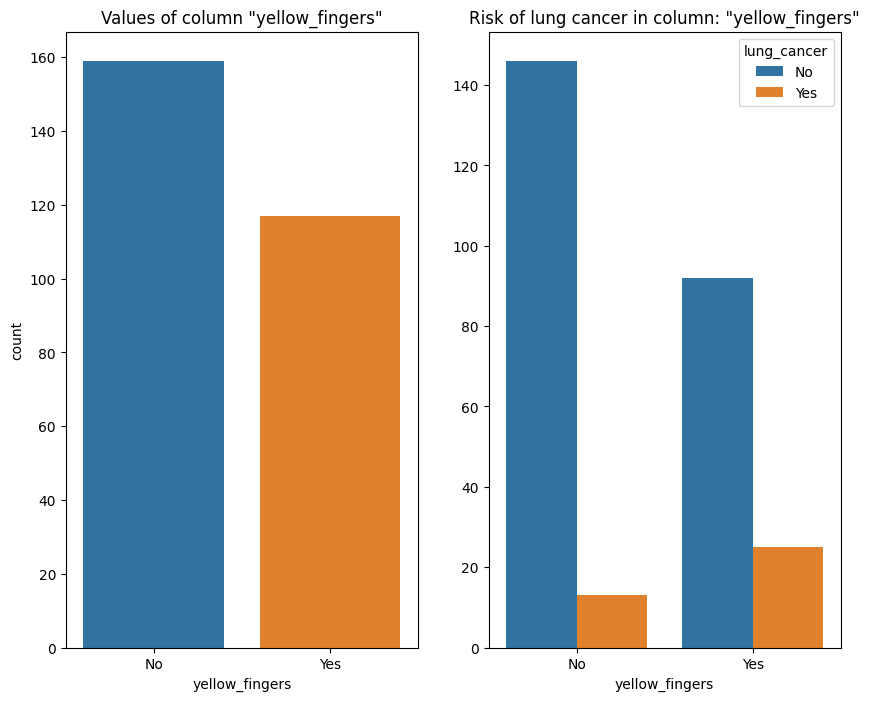

Number of unique values ("anxiety"): 2
         count
anxiety       
Yes        139
No         137


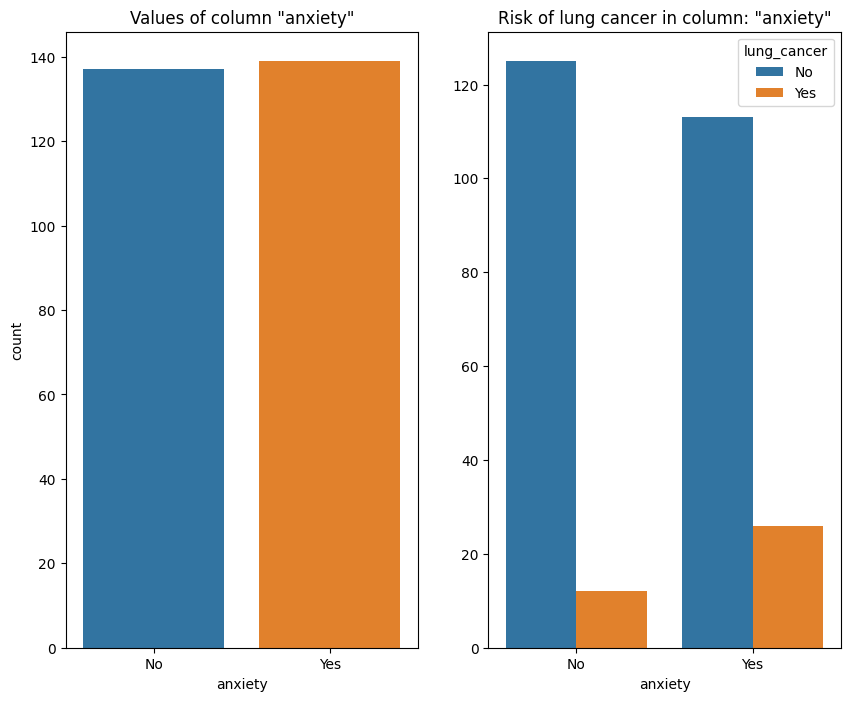

Number of unique values ("peer_pressure"): 2
               count
peer_pressure       
No               140
Yes              136


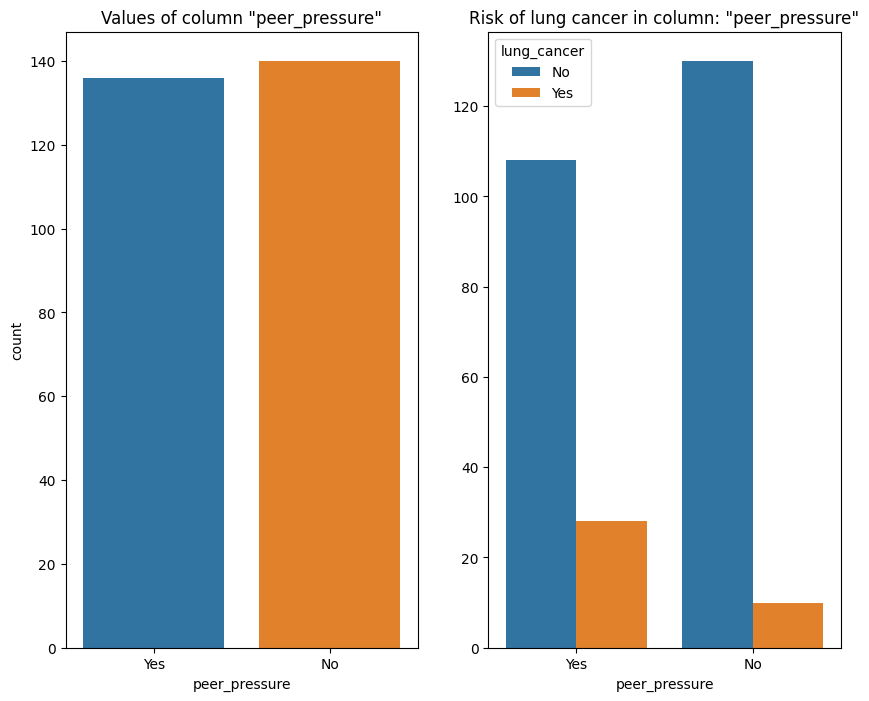

Number of unique values ("chronic disease"): 2
                 count
chronic disease       
No                 144
Yes                132


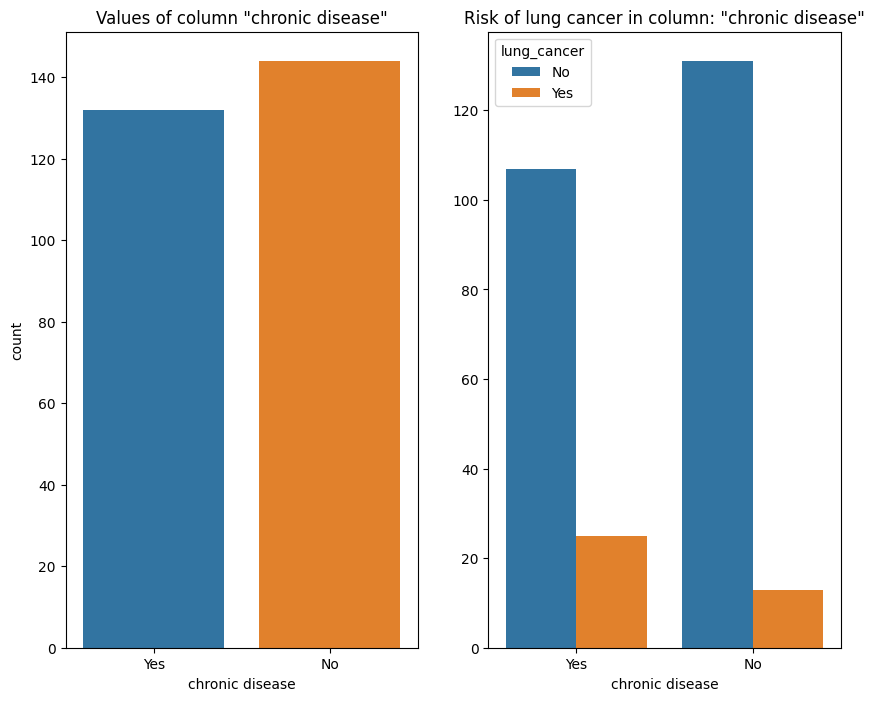

Number of unique values ("fatigue "): 2
          count
fatigue        
No          183
Yes          93


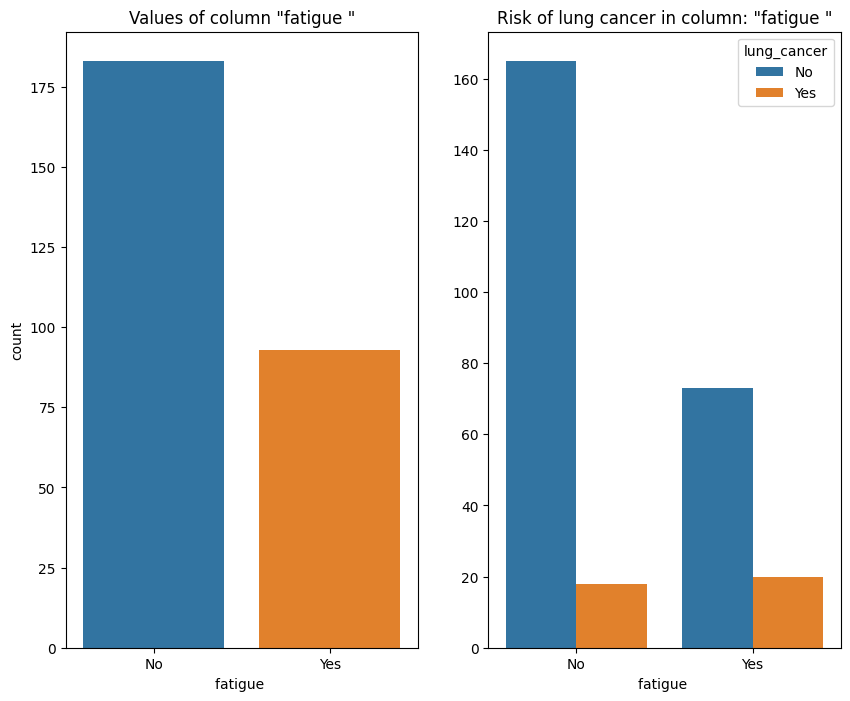

Number of unique values ("allergy "): 2
          count
allergy        
No          151
Yes         125


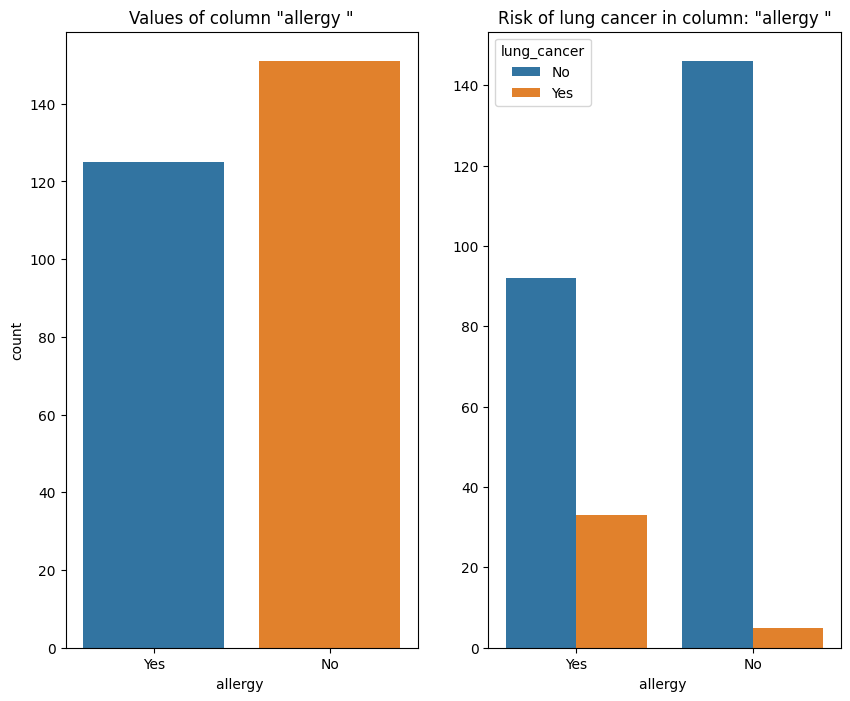

Number of unique values ("wheezing"): 2
          count
wheezing       
No          151
Yes         125


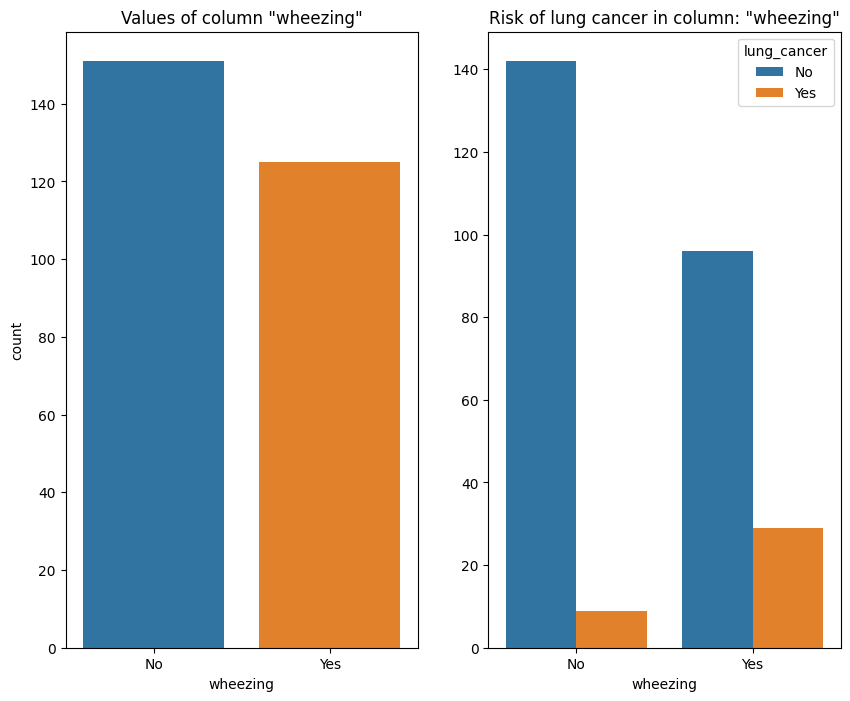

Number of unique values ("alcohol consuming"): 2
                   count
alcohol consuming       
No                   152
Yes                  124


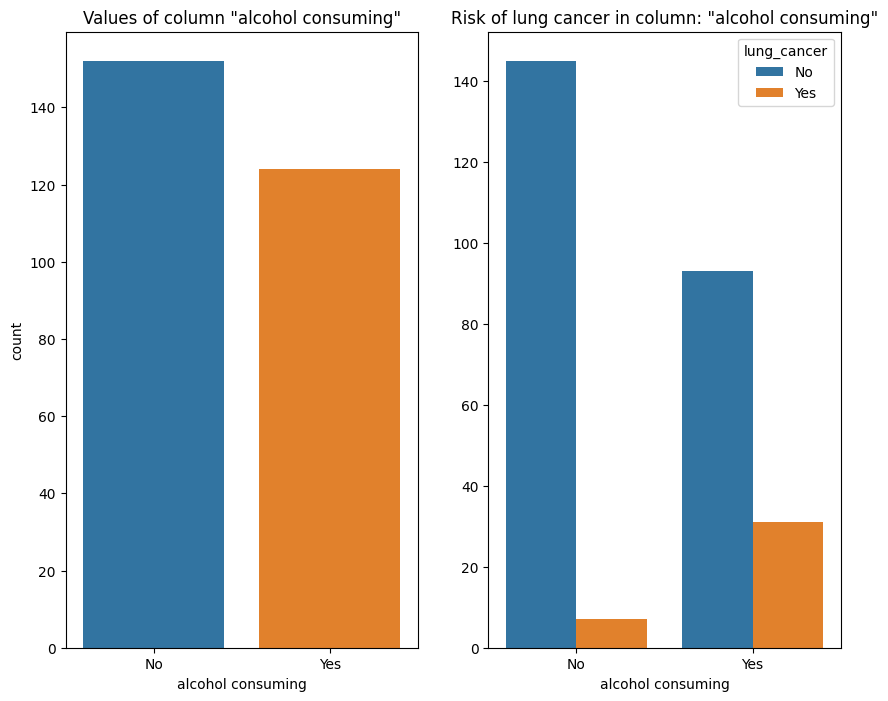

Number of unique values ("coughing"): 2
          count
coughing       
No          159
Yes         117


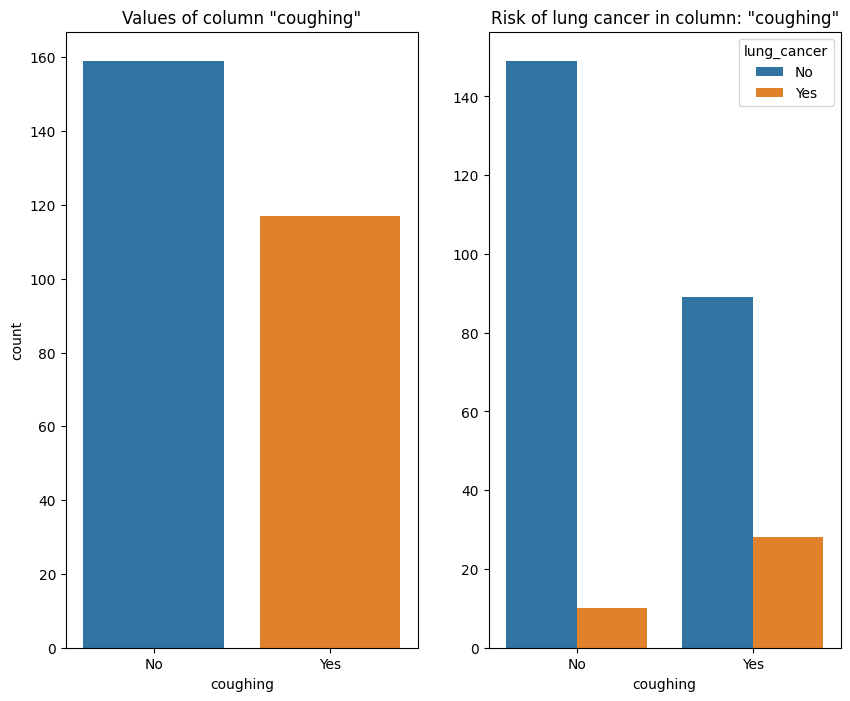

Number of unique values ("shortness of breath"): 2
                     count
shortness of breath       
No                     174
Yes                    102


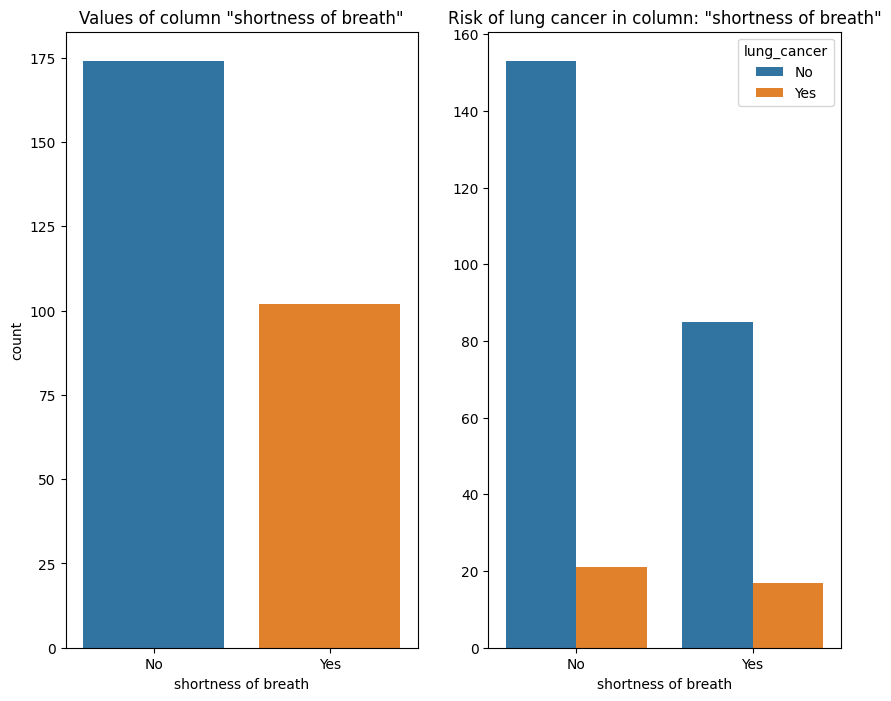

Number of unique values ("swallowing difficulty"): 2
                       count
swallowing difficulty       
Yes                      147
No                       129


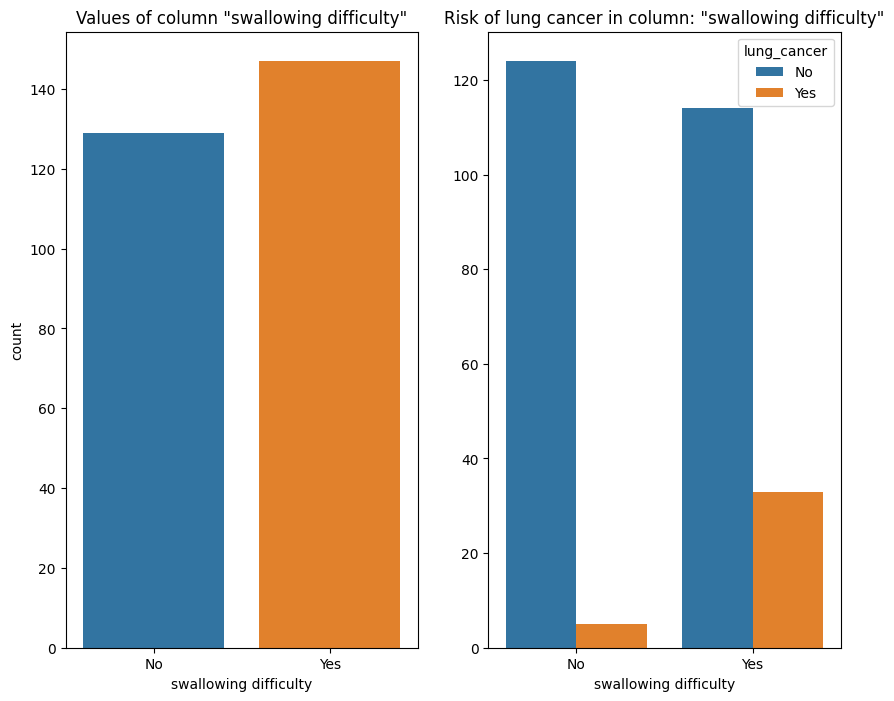

Number of unique values ("chest pain"): 2
            count
chest pain       
No            154
Yes           122


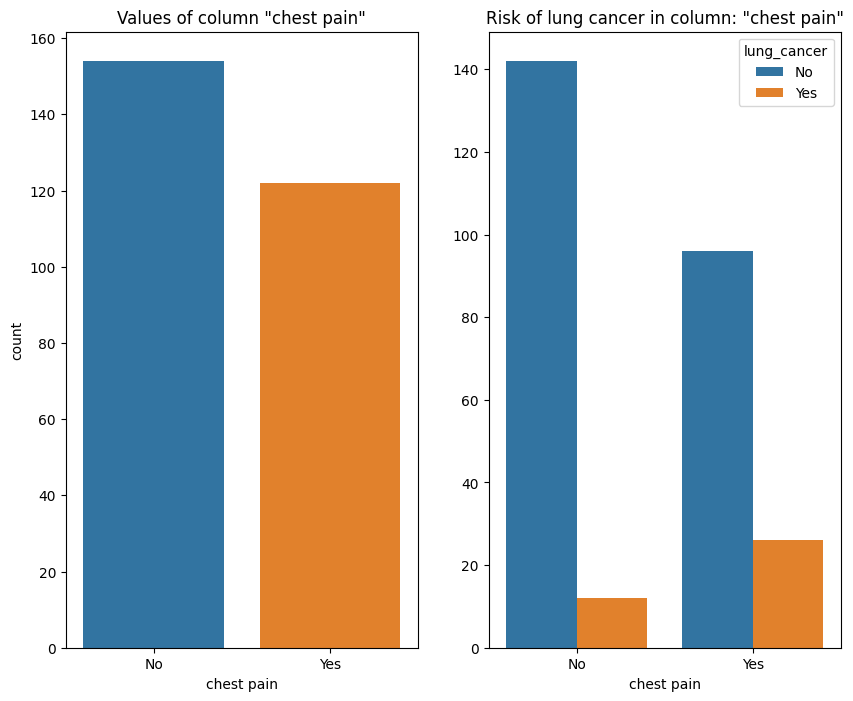

In [49]:
def plot_col(dataframe):
    dataframe = data.drop(['age'], axis=1)
    dataframe = dataframe.astype('str')
    dataframe = dataframe.replace({'1':'Yes', '2':'No'})

    for col in dataframe.columns:
        if col != 'lung_cancer':
            print(f'Number of unique values ("{col}"): {dataframe[col].nunique()}')
            print(pd.DataFrame(dataframe[col].value_counts()))
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
            sns.countplot(data=dataframe, x=col, hue='lung_cancer', ax=ax[1]);
            ax[1].set_title(f'Risk of lung cancer in column: "{col}"')
            ax[1].set_ylabel('')
            sns.countplot(data=dataframe, x=col, ax=ax[0]);
            ax[0].set_title(f'Values of column "{col}"')
            plt.show()

plot_col(data)

In [50]:
pd.crosstab(data['lung_cancer'],data['swallowing difficulty'],margins=True)


swallowing difficulty,1,2,All
lung_cancer,,,
1,33,5,38
2,114,124,238
All,147,129,276


# split data feature & target 

In [51]:
x=data.drop('lung_cancer',axis=1)
y=data['lung_cancer']

# scale feature data 

In [52]:
scale = StandardScaler()
xscale = scale.fit_transform(x)

# Split train & test data 

In [53]:
x_train,x_test,y_train,y_test=train_test_split(xscale,y,test_size=0.2,random_state=42)

# Build model

In [54]:
log_reg=LogisticRegression()
rf_clf=RandomForestClassifier()
svc=SVC()
xgb=XGBClassifier()

In [55]:
#label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [56]:
def all(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_test=accuracy_score(y_pred,y_test)*100
    accuracy_train=model.score(x_train,y_train)*100
    print('accuracy after train model :',accuracy_train)
    print('accuracy after test  model :',accuracy_test)

In [57]:
all(log_reg)

accuracy after train model : 93.18181818181817
accuracy after test  model : 92.85714285714286


In [58]:
all(rf_clf)

accuracy after train model : 100.0
accuracy after test  model : 85.71428571428571


In [59]:
all(svc)

accuracy after train model : 94.54545454545455
accuracy after test  model : 83.92857142857143


In [60]:
all(xgb)

accuracy after train model : 99.54545454545455
accuracy after test  model : 87.5


In [61]:
len(data.columns)

16

# Evaluate model

In [62]:
def cm(model):
    y_pred=model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(cmap='Greens')
    plt.title('Confusion Matrix')
    plt.show()

<Figure size 800x600 with 0 Axes>

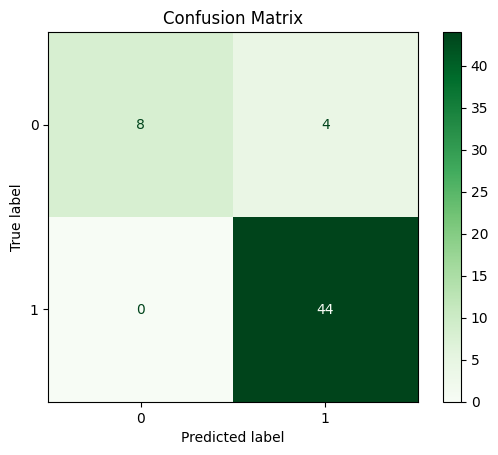

In [63]:
cm(log_reg)

In [64]:
def class_report(model):
    y_pred=model.predict(x_test)
    report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
    print("Classification Report:\n", report)

In [65]:
class_report(log_reg)

Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      0.67      0.80        12
   Malignant       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56

